In [91]:
import pandas as pd 
import numpy as np
import nltk

In [92]:
#  follow 10 steps for text preprocessing

In [93]:
temp_df=pd.read_csv("C:\\Users\\guriv\\Downloads\\IMDB Dataset.csv (6)\\IMDB Dataset.csv")

In [94]:
df=temp_df.loc[:1000, :]

In [95]:
df

review sentiment
0     One of the other reviewers has mentioned that ...  positive
1     A wonderful little production. <br /><br />The...  positive
2     I thought this was a wonderful way to spend ti...  positive
3     Basically there's a family where a little boy ...  negative
4     Petter Mattei's "Love in the Time of Money" is...  positive
...                                                 ...       ...
996   I hated it. I hate self-aware pretentious inan...  negative
997   I usually try to be professional and construct...  negative
998   If you like me is going to see this in a film ...  negative
999   This is like a zoology textbook, given that it...  negative
1000  This movie is awful, I can't even be bothered ...  negative

[1001 rows x 2 columns]

In [96]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [97]:
df["sentiment"].value_counts()

sentiment
positive    501
negative    500
Name: count, dtype: int64

In [98]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [99]:
df.duplicated().sum()

0

In [100]:
import re 
def removing_html(text):
    return re.sub(r"<.*?>", "", text)

In [101]:
removing_html("<br /><br />The first thing that struck me about Oz was its brutality ")

'The first thing that struck me about Oz was its brutality '

In [102]:
df["review"]=df["review"].apply(removing_html)

C:\Users\guriv\AppData\Local\Temp\ipykernel_18496\226545914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["review"].apply(removing_html)


In [103]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [104]:
import re 
def removing_url(text):
    return re.sub(r"", "", text)

In [105]:
df["review"]=df["review"].str.lower()

C:\Users\guriv\AppData\Local\Temp\ipykernel_18496\4202753376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["review"].str.lower()


In [106]:
df

review sentiment
0     one of the other reviewers has mentioned that ...  positive
1     a wonderful little production. the filming tec...  positive
2     i thought this was a wonderful way to spend ti...  positive
3     basically there's a family where a little boy ...  negative
4     petter mattei's "love in the time of money" is...  positive
...                                                 ...       ...
996   i hated it. i hate self-aware pretentious inan...  negative
997   i usually try to be professional and construct...  negative
998   if you like me is going to see this in a film ...  negative
999   this is like a zoology textbook, given that it...  negative
1000  this movie is awful, i can't even be bothered ...  negative

[1001 rows x 2 columns]

In [107]:
import emoji
def removing_emoji(text):
    return emoji.demojize(text)
df["review"]=df["review"].apply(removing_emoji)

C:\Users\guriv\AppData\Local\Temp\ipykernel_18496\2389670638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["review"].apply(removing_emoji)


In [108]:
df["review"]

0       one of the other reviewers has mentioned that ...
1       a wonderful little production. the filming tec...
2       i thought this was a wonderful way to spend ti...
3       basically there's a family where a little boy ...
4       petter mattei's "love in the time of money" is...
                              ...                        
996     i hated it. i hate self-aware pretentious inan...
997     i usually try to be professional and construct...
998     if you like me is going to see this in a film ...
999     this is like a zoology textbook, given that it...
1000    this movie is awful, i can't even be bothered ...
Name: review, Length: 1001, dtype: object

In [109]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [110]:
def remove_punctuation(text):
    a='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for i in a:
        text=text.replace(i,"")
    return text

In [111]:
remove_punctuation("aflaf;af'afah2llf#alf$laf:")

'aflafafafah2llfalflaf'

In [112]:
df["review"]=df["review"].apply(remove_punctuation)

C:\Users\guriv\AppData\Local\Temp\ipykernel_18496\3158843962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["review"].apply(remove_punctuation)


In [113]:
df["review"][1000]

'this movie is awful i cant even be bothered to write a review on this garbage all i will say it is one of the most boring films ive ever seenand the acting is very bad the boy who plays the main character really annoys me hes got the same expression on his face through out the movie i just want to slap him basically 80 of the movie is slow motion shots of skateboarders weird music and utter shtapparently ive got to write at least 10 lines of text to submit this comment so ill use up a few more lines by saying the lead character has got one of those faces you just want to slapmeh i give upthis movie sucks '

In [114]:
import textblob

In [115]:
from textblob import TextBlob

In [116]:
TextBlob("marriag").correct().string

'marriage'

In [117]:
def spell_check(text):
    return TextBlob(text).correct().string

In [118]:
# df["review"].apply(spell_check)

In [119]:
from nltk.corpus import stopwords
dic=stopwords.words("english")


In [120]:
text= "i want to get this job for sure"
" ".join([i for i in text.split(" ") if i not in dic])

'want get job sure'

In [121]:

def removing_stop_words(text):
    return " ".join([i for i in text.split(" ") if i not in dic])
    
    

In [122]:
df["review"][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [123]:
df

review sentiment
0     one of the other reviewers has mentioned that ...  positive
1     a wonderful little production the filming tech...  positive
2     i thought this was a wonderful way to spend ti...  positive
3     basically theres a family where a little boy j...  negative
4     petter matteis love in the time of money is a ...  positive
...                                                 ...       ...
996   i hated it i hate selfaware pretentious inanit...  negative
997   i usually try to be professional and construct...  negative
998   if you like me is going to see this in a film ...  negative
999   this is like a zoology textbook given that its...  negative
1000  this movie is awful i cant even be bothered to...  negative

[1001 rows x 2 columns]

In [124]:
from nltk.tokenize import word_tokenize

In [125]:
df["review"]=df["review"].apply(word_tokenize)

C:\Users\guriv\AppData\Local\Temp\ipykernel_18496\2298362121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["review"].apply(word_tokenize)


In [126]:
from nltk.stem.porter import PorterStemmer

In [127]:
pt = PorterStemmer()
pt.stem("work worked working")

'work worked work'

In [128]:
def stemming(list):
    return " ".join([pt.stem(i) for i in list ])

In [129]:
df["review"]=df["review"].apply(stemming)

C:\Users\guriv\AppData\Local\Temp\ipykernel_18496\228690616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"]=df["review"].apply(stemming)


In [130]:
df

review sentiment
0     one of the other review ha mention that after ...  positive
1     a wonder littl product the film techniqu is ve...  positive
2     i thought thi wa a wonder way to spend time on...  positive
3     basic there a famili where a littl boy jake th...  negative
4     petter mattei love in the time of money is a v...  positive
...                                                 ...       ...
996   i hate it i hate selfawar pretenti inan that m...  negative
997   i usual tri to be profession and construct whe...  negative
998   if you like me is go to see thi in a film hist...  negative
999   thi is like a zoolog textbook given that it de...  negative
1000  thi movi is aw i cant even be bother to write ...  negative

[1001 rows x 2 columns]

In [131]:
X=df.iloc[:,0:1]

In [132]:
from sklearn.preprocessing import LabelEncoder

label_enocoder = LabelEncoder()


In [133]:
y=label_enocoder.fit_transform(df["sentiment"])

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [135]:
X_train

review
535  thi film is realli vile it play on the urban p...
696  everyon my name may sound weird but there wa n...
557  crossfir remain one of the best hollywood mess...
643  angela sandra bullock is a comput expert but b...
597  in short if you want to watch burt reynold bes...
..                                                 ...
106  the perform of everi actor and actress in the ...
270  clifton webb is one of my favorit howev mister...
860  thi product wa quit a surpris for me i absolut...
435  you wear onli the best italian suit from arman...
102  i bought thi game on an impuls buy from walmar...

[800 rows x 1 columns]

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
cv=CountVectorizer()

In [138]:
X_train_bow=cv.fit_transform(X_train["review"]).toarray()
X_test_bow=cv.transform(X_test["review"]).toarray()

In [142]:
X_train_bow.shape

(800, 13818)

In [143]:
pd.DataFrame(X_train_bow, columns=cv.get_feature_names_out())

007  10  100  1000  10000  100000  10002000  100th  101  1010  ...  \
0      0   0    0     0      0       0         0      0    0     0  ...   
1      0   0    0     0      0       0         0      0    0     0  ...   
2      0   0    0     0      0       0         0      0    0     0  ...   
3      0   0    0     0      0       0         0      0    0     0  ...   
4      0   0    0     0      0       0         0      0    0     0  ...   
..   ...  ..  ...   ...    ...     ...       ...    ...  ...   ...  ...   
795    0   0    0     0      0       0         0      0    0     0  ...   
796    0   0    0     0      0       0         0      0    0     0  ...   
797    0   0    0     0      0       0         0      0    0     0  ...   
798    1   0    0     0      0       0         0      0    0     0  ...   
799    0   0    0     0      0       0         0      0    0     0  ...   

     zombierel  zombievers  zone  zoo  zoom  zp  zucker  zulu  \
0            0           0     0    0     0   0       0     0   
1            0           0     0    0     0   0       0     0   
2            0           0     0    0     0   0       0     0   
3            0           0     0    0     0   0       0     0   
4            0           0     0    0     0   0       0     0   
..         ...         ...   ...  ...   ...  ..     ...   ...   
795          0           0     0    0     0   0       0     0   
796          0           0     0    0     0   0       0     0   
797          0           0     0    0     0   0       0     0   
798          0           0     0    0     0   0       0     0   
799          0           0     0    0     0   0       0     0   

     zzzzzzzzzzzzzzzzzz  ísnt  
0                     0     0  
1                     0     0  
2                     0     0  
3                     0     0  
4                     0     0  
..                  ...   ...  
795                   0     0  
796                   0     0  
797                   0     0  
798                   0     0  
799                   0     0  

[800 rows x 13818 columns]

In [144]:
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [146]:
y_train.shape

(800,)

In [148]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [149]:
y_pred = gnb.predict(X_test_bow)

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [151]:
accuracy_score(y_test,y_pred)

0.582089552238806

<Axes: >

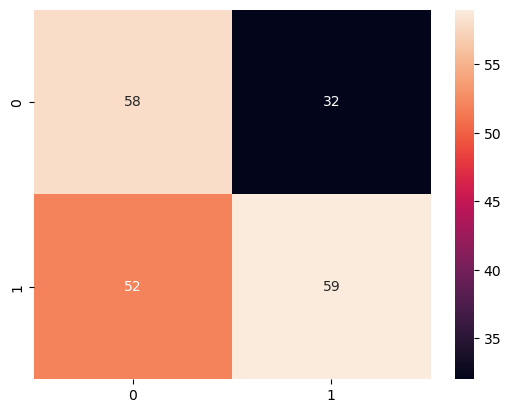

In [162]:
sns.heatmap((confusion_matrix(y_test,y_pred)), annot=True)

In [165]:
from sklearn.ensemble import RandomForestClassifier
cv=CountVectorizer(max_features=3000)
X_train_bow=cv.fit_transform(X_train["review"]).toarray()
X_test_bow=cv.transform(X_test["review"]).toarray()
rfc=RandomForestClassifier()
rfc.fit(X_train_bow,y_train)

RandomForestClassifier()

In [169]:
y_pred_rfc=rfc.predict(X_test_bow)

In [170]:
accuracy_score(y_test,y_pred_rfc)

0.7562189054726368

In [230]:
from sklearn.ensemble import RandomForestClassifier
cv=CountVectorizer(ngram_range=(1,2))
X_train_bow=cv.fit_transform(X_train["review"]).toarray()
X_test_bow=cv.transform(X_test["review"]).toarray()
rfc=RandomForestClassifier()
rfc.fit(X_train_bow,y_train)
y_pred_rfc=rfc.predict(X_test_bow)
accuracy_score(y_test,y_pred_rfc)

0.7661691542288557

In [236]:
new_review = new_review = """
I found Oz to be overly violent and unnecessarily graphic. The constant portrayal of brutality and harsh prison life was too disturbing. The characters lacked depth, and the plot felt repetitive with little character development. It seemed more focused on shock value than meaningful storytelling. I couldn't connect with any of the characters, and the overall tone was bleak and unsettling. Not recommended for those looking for a nuanced or uplifting storyline.
"""
new_review_transformed = cv.transform([new_review]).toarray()
new_review_transformed
y_pred_new = rfc.predict(new_review_transformed)

# Print prediction
if y_pred_new == 1:
    print("Prediction: Positive Sentiment")
else:
    print("Prediction: Negative Sentiment")

Prediction: Positive Sentiment


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [224]:
df["review"][0]

'one of the other review ha mention that after watch just 1 oz episod youll be hook they are right as thi is exactli what happen with meth first thing that struck me about oz wa it brutal and unflinch scene of violenc which set in right from the word go trust me thi is not a show for the faint heart or timid thi show pull no punch with regard to drug sex or violenc it is hardcor in the classic use of the wordit is call oz as that is the nicknam given to the oswald maximum secur state penitentari it focus mainli on emerald citi an experiment section of the prison where all the cell have glass front and face inward so privaci is not high on the agenda em citi is home to manyaryan muslim gangsta latino christian italian irish and moreso scuffl death stare dodgi deal and shadi agreement are never far awayi would say the main appeal of the show is due to the fact that it goe where other show wouldnt dare forget pretti pictur paint for mainstream audienc forget charm forget romanceoz doesnt 

In [192]:
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess
story=[]

for doc in df["review"]:
    raw_sent =sent_tokenize(doc)
    for i in raw_sent:
        story.append(simple_preprocess(i))
                         
                        
            
        

In [194]:
story

[['one',
  'of',
  'the',
  'other',
  'review',
  'ha',
  'mention',
  'that',
  'after',
  'watch',
  'just',
  'oz',
  'episod',
  'youll',
  'be',
  'hook',
  'they',
  'are',
  'right',
  'as',
  'thi',
  'is',
  'exactli',
  'what',
  'happen',
  'with',
  'meth',
  'first',
  'thing',
  'that',
  'struck',
  'me',
  'about',
  'oz',
  'wa',
  'it',
  'brutal',
  'and',
  'unflinch',
  'scene',
  'of',
  'violenc',
  'which',
  'set',
  'in',
  'right',
  'from',
  'the',
  'word',
  'go',
  'trust',
  'me',
  'thi',
  'is',
  'not',
  'show',
  'for',
  'the',
  'faint',
  'heart',
  'or',
  'timid',
  'thi',
  'show',
  'pull',
  'no',
  'punch',
  'with',
  'regard',
  'to',
  'drug',
  'sex',
  'or',
  'violenc',
  'it',
  'is',
  'hardcor',
  'in',
  'the',
  'classic',
  'use',
  'of',
  'the',
  'wordit',
  'is',
  'call',
  'oz',
  'as',
  'that',
  'is',
  'the',
  'nicknam',
  'given',
  'to',
  'the',
  'oswald',
  'maximum',
  'secur',
  'state',
  'penitentari',
  'i

In [197]:
from gensim.models import Word2Vec

In [199]:
w2v=Word2Vec(window=10, min_count=2)

In [201]:
w2v.build_vocab(story)

In [218]:
w2v.train(story,total_examples=w2v.corpus_count , epochs=model.epochs)

(783037, 1078285)

In [206]:
w2v.corpus_count

1001

In [237]:
w2v.wv.key_to_index

{'the': 0,
 'and': 1,
 'of': 2,
 'to': 3,
 'is': 4,
 'it': 5,
 'in': 6,
 'thi': 7,
 'that': 8,
 'movi': 9,
 'wa': 10,
 'film': 11,
 'as': 12,
 'with': 13,
 'for': 14,
 'but': 15,
 'on': 16,
 'you': 17,
 'be': 18,
 'not': 19,
 'hi': 20,
 'have': 21,
 'are': 22,
 'he': 23,
 'one': 24,
 'at': 25,
 'all': 26,
 'by': 27,
 'like': 28,
 'an': 29,
 'who': 30,
 'from': 31,
 'so': 32,
 'they': 33,
 'just': 34,
 'there': 35,
 'about': 36,
 'or': 37,
 'out': 38,
 'ha': 39,
 'if': 40,
 'what': 41,
 'see': 42,
 'get': 43,
 'her': 44,
 'make': 45,
 'some': 46,
 'watch': 47,
 'veri': 48,
 'time': 49,
 'more': 50,
 'charact': 51,
 'good': 52,
 'when': 53,
 'which': 54,
 'even': 55,
 'no': 56,
 'their': 57,
 'would': 58,
 'up': 59,
 'my': 60,
 'stori': 61,
 'she': 62,
 'me': 63,
 'can': 64,
 'were': 65,
 'realli': 66,
 'scene': 67,
 'do': 68,
 'had': 69,
 'other': 70,
 'onli': 71,
 'much': 72,
 'well': 73,
 'into': 74,
 'will': 75,
 'been': 76,
 'go': 77,
 'think': 78,
 'your': 79,
 'becaus': 80,
 'than

In [243]:
def document_vecotor(text):
    a=[word for word in text.split(" ") if word in w2v.wv.index_to_key]
    return np.mean(w2v.wv[a],axis=0)

In [246]:
document_vecotor(df["review"][0])

array([-0.18221606,  0.33725843,  0.04877621,  0.05080575,  0.15999465,
       -0.6634271 ,  0.40719977,  0.94959307, -0.4618504 , -0.35541487,
       -0.34291652, -0.63755226, -0.27087182,  0.46116742,  0.27565125,
       -0.23105778,  0.40739536, -0.26278284, -0.21046646, -1.0536584 ,
        0.30777332,  0.09715699,  0.5461131 , -0.15249947, -0.07299812,
       -0.07602963, -0.48886666,  0.0108858 , -0.4902155 ,  0.1350255 ,
        0.3455292 , -0.15870298,  0.31044662, -0.44649264, -0.24821751,
        0.5679627 ,  0.15827025, -0.29900402, -0.50208324, -0.70308274,
        0.05631441, -0.5741435 , -0.28424996,  0.22710507,  0.57185775,
       -0.00762583, -0.4517422 , -0.08812386,  0.3053645 ,  0.20984882,
        0.13567503, -0.5503384 ,  0.06512257, -0.20880218, -0.32112902,
       -0.01304313,  0.3194658 , -0.20805265, -0.62029785,  0.14463769,
        0.17518122, -0.05440379,  0.07240474,  0.02547132, -0.4492424 ,
        0.8654364 , -0.10361513,  0.430774  , -0.44810653,  0.61

In [257]:
from tqdm import tqdm


X=[]
for doc in tqdm(df["review"].values):
    X.append(document_vecotor(doc))
    

100%|██████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:13<00:00, 76.12it/s]


In [252]:
X=np.array(X)

In [253]:
X.shape

(1001, 100)

In [259]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [260]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [261]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_pred_rfc)

0.5870646766169154

In [262]:
X_train

[array([-0.18980071,  0.3473445 ,  0.07025007,  0.063647  ,  0.14358576,
        -0.68301445,  0.43128437,  1.005095  , -0.5097528 , -0.37280357,
        -0.35512447, -0.67631245, -0.30272862,  0.49220037,  0.2827965 ,
        -0.2324526 ,  0.44512162, -0.28042838, -0.24076201, -1.1354473 ,
         0.33440644,  0.12083233,  0.5953344 , -0.15720241, -0.09174117,
        -0.07788974, -0.52991354,  0.02157286, -0.53207475,  0.14577189,
         0.3582697 , -0.17217135,  0.33954507, -0.47074345, -0.2507012 ,
         0.5838458 ,  0.19357447, -0.30746537, -0.5424755 , -0.73754114,
         0.05986084, -0.61393964, -0.31823352,  0.26696205,  0.6221989 ,
        -0.01193624, -0.48276126, -0.09399902,  0.3407471 ,  0.22714603,
         0.1283749 , -0.60507095,  0.06386717, -0.23046915, -0.3587258 ,
        -0.01730401,  0.34566963, -0.23464203, -0.6528336 ,  0.15925035,
         0.19104932, -0.04994352,  0.08092214,  0.02181374, -0.5125633 ,
         0.9283543 , -0.11750335,  0.4603502 , -0.4